In [2]:
import numpy as np
import pandas as pd
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers.recurrent import GRU
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time
import math
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
from sklearn.metrics import mean_squared_error

# read the dataset
prices_dataset =  pd.read_csv('prices.csv', header=0)

In [3]:
def initialize(company,look_back,numday):
    data = prices_dataset[prices_dataset['symbol']==str(company)]
    stock_prices = data.close.values.astype('float32')
    stock_prices = stock_prices.reshape(len(stock_prices), 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    stock_prices = scaler.fit_transform(stock_prices)
    train_size = int(len(stock_prices) * 0.80)
    test_size = len(stock_prices) - train_size
    train, test = stock_prices[0:train_size,:], stock_prices[train_size:len(stock_prices),:]

# split the data into test and train

    dataX, dataY = [], []
    for i in range(len(train)-look_back):
        a = train[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(train[i + look_back, 0])

    
    trainX = np.array(dataX)
    trainY = np.array(dataY)
    
    dataX, dataY = [], []
    for i in range(len(test)-look_back):
        a = test[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(test[i + look_back, 0])

    testX = np.array(dataX)
    testY = np.array(dataY)
    
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # initialize the model
    model = Sequential()

    model.add(LSTM(
        input_dim=look_back,
        output_dim=50,
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        100,
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=1))
    model.add(Activation('linear'))

    start = time.time()
    model.compile(loss='mse', optimizer='rmsprop')
    print ('compilation time : ', time.time() - start)
    
    model.fit(
    trainX,
    trainY,
    batch_size=100,
    nb_epoch=50,
    validation_split=0.05)
    
    plt.plot(scaler.inverse_transform(testY.reshape(-1, 1)))
    plt.plot(scaler.inverse_transform(np.array(model.predict(testX)).reshape(-1, 1)))
    plt.legend()
    plt.show()
    
    x = predict_n(numday,testX,model,look_back)
    x = scaler.inverse_transform(np.array(x).reshape(-1, 1))

    for i in range(0,len(x)):
        print("The prediction for day "+str(i+1)+" is "+ str(x[i-1][0]))
    
    
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    if (len(x)>=2):
        plt.plot(x)
        plt.legend()
        plt.show()

In [12]:
def initializeGRU(company,look_back,numday):
    data = prices_dataset[prices_dataset['symbol']==str(company)]
    stock_prices = data.close.values.astype('float32')
    stock_prices = stock_prices.reshape(len(stock_prices), 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    stock_prices = scaler.fit_transform(stock_prices)
    train_size = int(len(stock_prices) * 0.80)
    test_size = len(stock_prices) - train_size
    train, test = stock_prices[0:train_size,:], stock_prices[train_size:len(stock_prices),:]

# split the data into test and train

    dataX, dataY = [], []
    for i in range(len(train)-look_back):
        a = train[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(train[i + look_back, 0])

    
    trainX = np.array(dataX)
    trainY = np.array(dataY)
    
    dataX, dataY = [], []
    for i in range(len(test)-look_back):
        a = test[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(test[i + look_back, 0])

    testX = np.array(dataX)
    testY = np.array(dataY)
    
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # initialize the model
    model = Sequential()

    model.add(GRU(
        input_dim=look_back,
        output_dim=50,
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(GRU(
        100,
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=1))
    model.add(Activation('linear'))

    start = time.time()
    model.compile(loss='mse', optimizer='rmsprop')
    print ('compilation time : ', time.time() - start)
    
    model.fit(
    trainX,
    trainY,
    batch_size=100,
    nb_epoch=50,
    validation_split=0.05)
    
    plt.plot(scaler.inverse_transform(testY.reshape(-1, 1)))
    plt.plot(scaler.inverse_transform(np.array(model.predict(testX)).reshape(-1, 1)))
    plt.legend()
    plt.show()
    
    x = predict_n(numday,testX,model,look_back)
    x = scaler.inverse_transform(np.array(x).reshape(-1, 1))
    
    for i in range(0,len(x)):
        print("The prediction for day "+str(i+1)+" is "+ str(x[i-1][0]))
    
    
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))

    if (len(x)>=2):
        x=[ I[0] for I in x ]
        plt.plot(x)
        plt.legend()
        plt.show()

In [5]:



# predicts stock price for nth day
def predict_n(number, testX, model,look_back):
    predicted = []
    arr = np.reshape(testX[len(testX)-1], (testX[len(testX)-1].shape[0], 1, testX[len(testX)-1].shape[1]))
    for i in range(int(number)):
        curr = model.predict(arr)
        for j in range(look_back-1):
            arr[0][0][j] = arr[0][0][j+1]
        arr[0][0][look_back-1] = curr
        predicted.append(curr)
    return predicted

In [6]:
def crowd_sentiment(company):
    stocktwits_data =  pd.read_csv('StockTwits_SPY.csv', header=0)
    senti = stocktwits_data.sentiment.values.astype('str')
    pos = 0
    neg = 0
    for i in senti:
        if i == 'bearish':
            neg += 1
        elif i == 'bullish':
            pos += 1
            
        if pos > neg:
            return "BULLISH"
        elif pos < neg:
            return "BEARISH"
        else:
            return "NEUTRAL"


In [7]:
import watson_developer_cloud

# Set up Assistant service.
service = watson_developer_cloud.AssistantV1(
  username = '9dcd5dac-d49b-42b0-85d6-4e5c0784ffd1', # replace with service username
  password = 'k4MH5tw21Qa1', # replace with service password
  version = '2018-02-16'
)
workspace_id = 'ef22da03-446b-45bc-a91d-2e39fb835dd9' # replace with workspace ID


Hi. Welcome to stock value predictor. What would you like to do?
>> stock
How many days you want to see the forecast?
>> 5
Which method would you like to use (LSTM, GRU)?
>> GRU
Which stocks forecast would you like to see? Please enter ticker number
>> MSFT


c:\users\smuminov\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:41: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
c:\users\smuminov\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(input_shape=(None, 2), units=50, return_sequences=True)`
c:\users\smuminov\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
c:\users\smuminov\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


compilation time :  0.017012596130371094
Train on 1336 samples, validate on 71 samples
Epoch 1/50
1336/1336 [==============================] - 1s 695us/step - loss: 0.0274 - val_loss: 0.0217
Epoch 2/50
1336/1336 [==============================] - 0s 50us/step - loss: 0.0056 - val_loss: 0.0091
Epoch 3/50
1336/1336 [==============================] - 0s 52us/step - loss: 0.0018 - val_loss: 0.0012
Epoch 4/50
1336/1336 [==============================] - 0s 56us/step - loss: 0.0011 - val_loss: 2.5311e-04
Epoch 5/50
1336/1336 [==============================] - 0s 57us/step - loss: 0.0011 - val_loss: 0.0065
Epoch 6/50
1336/1336 [==============================] - 0s 56us/step - loss: 0.0013 - val_loss: 2.2474e-04
Epoch 7/50
1336/1336 [==============================] - 0s 55us/step - loss: 0.0011 - val_loss: 2.7287e-04
Epoch 8/50
1336/1336 [==============================] - 0s 57us/step - loss: 9.9722e-04 - val_loss: 2.3614e-04
Epoch 9/50
1336/1336 [==============================] - 0s 53us/step

No handles with labels found to put in legend.


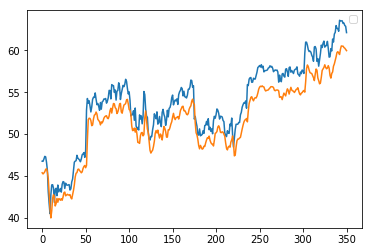

No handles with labels found to put in legend.


The prediction for day 1 is 53.295185


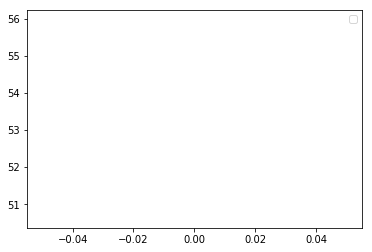

No handles with labels found to put in legend.


The prediction for day 2 is 59.981483


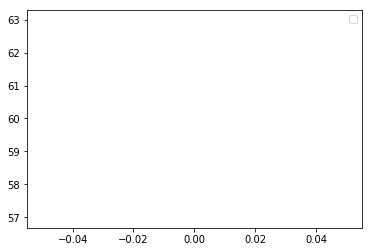

No handles with labels found to put in legend.


The prediction for day 3 is 58.342472


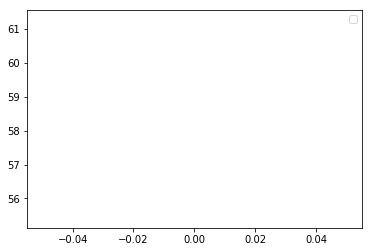

The prediction for day 4 is 56.451363


No handles with labels found to put in legend.


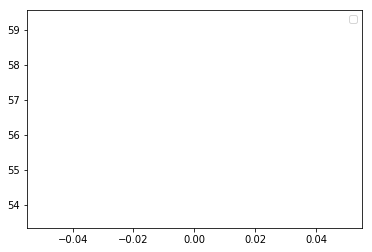

No handles with labels found to put in legend.


The prediction for day 5 is 54.841652


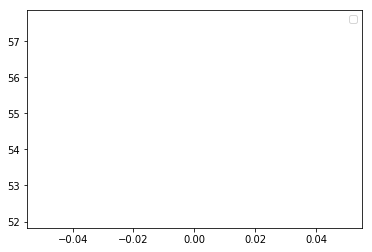

No handles with labels found to put in legend.


Train Score: 0.87 RMSE
Test Score: 2.34 RMSE


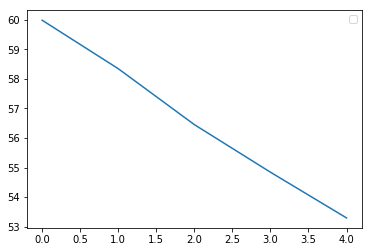

c:\users\smuminov\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Overall sentiment for stock is BEARISH
If you would like, enter another ticker for forecast:
>> bye
OK! See you later.


In [11]:
# Initialize with empty value to start the conversation.
user_input = ''
context = {}
current_action = ''
days = 1
methodu="LSTM"

# Main input/output loop
while current_action != 'end_conversation':

  # Send message to Assistant service.
  response = service.message(
    workspace_id = workspace_id,
    input = {
      'text': user_input
    },
    context = context
  )
    
  if response['intents']:
    if response['intents']==[{'intent': 'number', 'confidence': 1}]:
        days=user_input
        
  if(response['intents']==[{'confidence': 1, 'intent': 'methodused'}]):
    if(user_input=="LSTM"):
        methodu="LSTM"
    else:
        methodu="GRU"
    
        
  if response['intents']:
    if response['intents']==[{'confidence': 1, 'intent': 'stocks'}]:

        if(methodu=="LSTM"):
            initialize(user_input,2,days)
        else:
            initializeGRU(user_input,2,days)
        
        #sentiment from stock twits
        if(user_input=="MSFT"):
            sentiment = crowd_sentiment("SPY")
            print("Overall sentiment for stock is " + sentiment)
        
  # Print the output from dialog, if any.
  if response['output']['text']:
    print(response['output']['text'][0])
    
  # Update the stored context with the latest received from the dialog.
  context = response['context']
  # Check for action flags sent by the dialog.
  
    
  if 'action' in response['output']:
    current_action = response['output']['action']

  # If we're not done, prompt for next round of input.
  if current_action != 'end_conversation':
    user_input = input('>> ')

In [ ]:
data